In [50]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import os 
import tarfile
import zipfile
import HelperFunctions as hf

sns.set_palette('Set2')

# Overview

[M5 forecasting challenge](https://www.kaggle.com/c/m5-forecasting-accuracy/data)


## Data Description

- `calendar.csv` - Contains information about the dates on which the products are sold.

- `sales_train_validation.csv` - Contains the historical daily unit sales data per product and store `[d_1 - d_1913]`

- `sell_prices.csv` - Contains information about the price of the products sold per store and date.

- `sample_submission.csv` - The correct format for submissions. Reference the [Evaluation](https://www.kaggle.com/c/m5-forecasting-accuracy/overview/evaluation) tab for more info.

- `sales_train_evaluation.csv` - Includes sales `[d_1 - d_1941]` (labels used for the Public leaderboard)


## Task

- Forecast daily sales for the next 28 days



# 1. Download the Data

In [6]:
%%bash

kaggle competitions download m5-forecasting-accuracy -p data


100%|██████████| 45.8M/45.8M [00:02<00:00, 23.3MB/s]


In [2]:
def fetch_walmat_data():
    zip_path = os.path.join('data', 'm5-forecasting-accuracy.zip')    
    
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('data')
    
    print(zip_ref.namelist())

fetch_walmat_data()


['calendar.csv', 'sales_train_evaluation.csv', 'sales_train_validation.csv', 'sample_submission.csv', 'sell_prices.csv']


# 2. Read the Data

In [3]:
def load_calendar_data():    
    csv_path = os.path.join('data', 'calendar.csv')
    return pd.read_csv(csv_path)


def load_sell_price_data():
    csv_path = os.path.join('data', 'sell_prices.csv')
    return pd.read_csv(csv_path)


def load_sales_train_validation_data():
    csv_path = os.path.join('data', 'sales_train_validation.csv')
    return pd.read_csv(csv_path)


def load_sales_train_evaluation_data():
    csv_path = os.path.join('data', 'sales_train_evaluation.csv')
    return pd.read_csv(csv_path)


## 2.1 Calendar

In [47]:
calendar = load_calendar_data()

print(f'shape: {calendar.shape}\n')

print(calendar.info())


shape: (1969, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB
None


In [57]:
calendar.head(10)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


In [48]:
calendar[calendar['d'] == 'd_1913']


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1912,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0


In [64]:
calendar.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


### Date range

In [127]:
# 
print('Date Range:', np.min(calendar['date']), np.max(calendar['date']))

print('\nYear:', calendar['year'].unique(), len(calendar['year']))

print('\nWeekday:', calendar['weekday'].unique() , len(calendar['weekday']))

print('\nd:', calendar['d'].unique(), len(calendar['d']))


Date Range: 2011-01-29 2016-06-19

Year: [2011 2012 2013 2014 2015 2016] 1969

Weekday: ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday'] 1969

d: ['d_1' 'd_2' 'd_3' ... 'd_1967' 'd_1968' 'd_1969'] 1969


### Event Type/Name

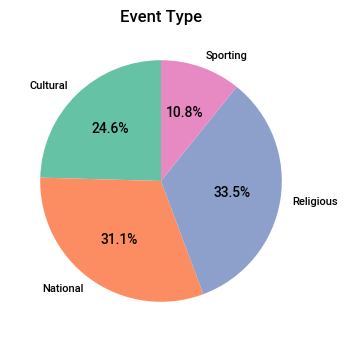

In [112]:
# Event 
a = calendar.groupby('event_type_1')['d'].count()
b = calendar.groupby('event_type_2')['d'].count()
event_type = a.add(b, fill_value=0)

fig1, ax1 = plt.subplots()
ax1.pie(event_type.values / sum(event_type.values), labels=event_type.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Event Type')
plt.show()


In [109]:
# Event Name

pd.concat([calendar['event_name_1'], calendar['event_name_2']], axis=0).unique()


array([nan, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
       'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
       'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'], dtype=object)

### Sweetviz

In [17]:
# quick eda by sweetViz
# calendar_report = sv.analyze(calendar)

# display the report
# calendar_report.show_html('Calendar.html')


### Summary


This data set contains calendar information with a total of 1969 days (from 2011-01-29 to 2016-06-19, 281 walmat weeks plus 2 extra days)

The obsevations are identified by the feature named $d$, which is the Foreign Key of other datasets.

There are and 14 columns. There are no duplicate rows.

There are 4 main event types: Cultural, Sporting, National, Religious.


Q:
- What does 'snap_CA, snap_TX, snap_WI' mean?



## 2.2 Sales

In [5]:
sales_train = load_sales_train_validation_data()

print(f'shape: {sales_train.shape}\n')

print(sales_train.info())

sales_train.head()


shape: (30490, 1919)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB
None


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


### Number of Items

In [53]:

item_len = len(sales_train['item_id'].unique())

print(f'{item_len} individual items in total')

sales_train[sales_train['item_id'] == 'HOBBIES_1_010']



3049 individual items in total


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,1,0,0,0,0,0,0,2,0,2
3058,HOBBIES_1_010_CA_2_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_2,CA,0,0,1,1,...,0,1,1,0,0,0,0,1,3,1
6107,HOBBIES_1_010_CA_3_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_3,CA,1,0,2,0,...,2,0,0,0,2,0,1,2,2,1
9156,HOBBIES_1_010_CA_4_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_4,CA,2,0,1,0,...,0,0,0,0,0,0,0,0,1,1
12205,HOBBIES_1_010_TX_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,1,0,1,1,0,0,0,1,0,1
15254,HOBBIES_1_010_TX_2_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,TX_2,TX,0,2,0,1,...,0,0,1,0,2,0,1,0,0,1
18303,HOBBIES_1_010_TX_3_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,TX_3,TX,1,0,0,1,...,2,1,2,2,0,0,0,1,0,0
21352,HOBBIES_1_010_WI_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,WI_1,WI,1,2,0,0,...,1,0,0,0,2,0,0,0,1,2
24401,HOBBIES_1_010_WI_2_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,WI_2,WI,0,0,0,1,...,0,0,0,1,1,0,0,0,1,2
27450,HOBBIES_1_010_WI_3_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,WI_3,WI,0,2,0,0,...,1,0,0,0,1,0,0,1,1,0


### Percent of Categories

cat_id
FOODS        14370
HOBBIES       5650
HOUSEHOLD    10470
Name: id, dtype: int64


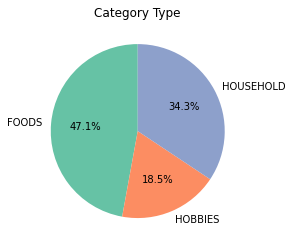

In [30]:
# Event 
category_num = sales_train.groupby('cat_id')['id'].count()
print(category_num)

fig1, ax1 = plt.subplots()
ax1.pie(category_num.values / sum(category_num.values), labels=category_num.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Category Type')
plt.show()



### Number of Departments

FOODS_3        8230
HOUSEHOLD_1    5320
HOUSEHOLD_2    5150
HOBBIES_1      4160
FOODS_2        3980
FOODS_1        2160
HOBBIES_2      1490
Name: dept_id, dtype: int64


Text(0.5, 1.0, 'Distribution of department across categories')

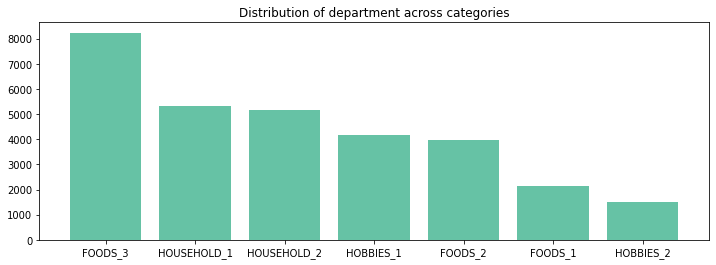

In [37]:
dept_counts = sales_train['dept_id'].value_counts()
print(dept_counts)

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(dept_counts.index, dept_counts.values)
ax.set_title('Distribution of department across categories')


In [41]:
sales_train['state_id'].value_counts()

CA    12196
WI     9147
TX     9147
Name: state_id, dtype: int64

In [42]:
sales_train['store_id'].value_counts()


WI_1    3049
TX_3    3049
CA_1    3049
CA_3    3049
CA_4    3049
TX_2    3049
WI_2    3049
TX_1    3049
CA_2    3049
WI_3    3049
Name: store_id, dtype: int64

### Summary

There are a total of 30490 rows and 1919 columns, including 3049 individual items across 10 stores.



## 2.3 Sell Prices

In [49]:
sell_price = load_sell_price_data()

print(f'shape: {sell_price.shape}\n')

print(sell_price.info())

sell_price.head()


shape: (6841121, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB
None


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [54]:
sell_price['store_id'].value_counts()


TX_2    701214
TX_1    699796
CA_1    698412
WI_3    696094
CA_3    693990
TX_3    691112
CA_4    679025
WI_2    678171
WI_1    665912
CA_2    637395
Name: store_id, dtype: int64

In [56]:
len(sell_price['item_id'].unique())


3049

In [80]:
len(sell_price['wm_yr_wk'].unique()), 7 * 281 + 2


(282, 1969)

# 3. Combining Data

In [59]:

df = hf.meltM5(sales_train, days = 730, items = 15000)



In [60]:
# Join with calendar and price data
df = hf.joinDataSets(df, calendar, sell_price, dropPriceNA=False)


In [61]:
df.head()


,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,FOODS_2_349_CA_1_validation,FOODS_2_349,FOODS_2,FOODS,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,FOODS_3_721_CA_4_validation,FOODS_3_721,FOODS_3,FOODS,CA_4,CA,d_1,1,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,1.98
2,HOUSEHOLD_1_250_CA_4_validation,HOUSEHOLD_1_250,HOUSEHOLD_1,HOUSEHOLD,CA_4,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,FOODS_1_002_TX_1_validation,FOODS_1_002,FOODS_1,FOODS,TX_1,TX,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,FOODS_3_209_CA_1_validation,FOODS_3_209,FOODS_3,FOODS,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN


In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10950000 entries, 0 to 10949999
Data columns (total 22 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   item_id       object 
 2   dept_id       object 
 3   cat_id        object 
 4   store_id      object 
 5   state_id      object 
 6   d             object 
 7   sold          int64  
 8   date          object 
 9   wm_yr_wk      int64  
 10  weekday       object 
 11  wday          int64  
 12  month         int64  
 13  year          int64  
 14  event_name_1  object 
 15  event_type_1  object 
 16  event_name_2  object 
 17  event_type_2  object 
 18  snap_CA       int64  
 19  snap_TX       int64  
 20  snap_WI       int64  
 21  sell_price    float64
dtypes: float64(1), int64(8), object(13)
memory usage: 1.9+ GB
